In [45]:
import pandas as pd
import datetime

In [46]:
df = pd.read_excel('data_dust_sensor_re.xlsx')

In [47]:
df

,Unnamed: 0,created_at,sectionname,name,time,number,value,status
0,0,2021-08-07 08:51:33.302,DUST-T1,pm1,08:51:33,1,0,normal
1,1,2021-08-07 08:51:33.302,DUST-T1,pm2_5,08:51:33,1,0,normal
2,2,2021-08-07 08:51:33.000,DUST-T1,pm10,08:51:33,1,0,normal
3,3,2021-08-07 08:52:05.537,DUST-T1,pm1,08:52:05,1,0,normal
4,4,2021-08-07 08:52:05.537,DUST-T1,pm2_5,08:52:05,1,0,normal
...,...,...,...,...,...,...,...,...
84352,84352,2021-08-20 10:02:58.786,DUST-T1,pm2_5,10:02:58,1,418,normal
84353,84353,2021-08-20 10:02:58.786,DUST-T1,pm10,10:02:58,1,1005,normal
84354,84354,2021-08-20 10:03:30.611,DUST-T1,pm1,10:03:30,1,137,normal
84355,84355,2021-08-20 10:03:30.611,DUST-T1,pm2_5,10:03:30,1,432,normal


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84357 entries, 0 to 84356
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   84357 non-null  int64         
 1   created_at   84357 non-null  datetime64[ns]
 2   sectionname  84357 non-null  object        
 3   name         84357 non-null  object        
 4   time         84357 non-null  object        
 5   number       84357 non-null  int64         
 6   value        84357 non-null  int64         
 7   status       84357 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 5.1+ MB


In [49]:
df['_at'] = df["created_at"].dt.strftime('%d-%m-%Y')
df

,Unnamed: 0,created_at,sectionname,name,time,number,value,status,_at
0,0,2021-08-07 08:51:33.302,DUST-T1,pm1,08:51:33,1,0,normal,07-08-2021
1,1,2021-08-07 08:51:33.302,DUST-T1,pm2_5,08:51:33,1,0,normal,07-08-2021
2,2,2021-08-07 08:51:33.000,DUST-T1,pm10,08:51:33,1,0,normal,07-08-2021
3,3,2021-08-07 08:52:05.537,DUST-T1,pm1,08:52:05,1,0,normal,07-08-2021
4,4,2021-08-07 08:52:05.537,DUST-T1,pm2_5,08:52:05,1,0,normal,07-08-2021
...,...,...,...,...,...,...,...,...,...
84352,84352,2021-08-20 10:02:58.786,DUST-T1,pm2_5,10:02:58,1,418,normal,20-08-2021
84353,84353,2021-08-20 10:02:58.786,DUST-T1,pm10,10:02:58,1,1005,normal,20-08-2021
84354,84354,2021-08-20 10:03:30.611,DUST-T1,pm1,10:03:30,1,137,normal,20-08-2021
84355,84355,2021-08-20 10:03:30.611,DUST-T1,pm2_5,10:03:30,1,432,normal,20-08-2021


In [50]:
df = df[['created_at', 'name', 'time', '_at', 'value']]
df

,created_at,name,time,_at,value
0,2021-08-07 08:51:33.302,pm1,08:51:33,07-08-2021,0
1,2021-08-07 08:51:33.302,pm2_5,08:51:33,07-08-2021,0
2,2021-08-07 08:51:33.000,pm10,08:51:33,07-08-2021,0
3,2021-08-07 08:52:05.537,pm1,08:52:05,07-08-2021,0
4,2021-08-07 08:52:05.537,pm2_5,08:52:05,07-08-2021,0
...,...,...,...,...,...
84352,2021-08-20 10:02:58.786,pm2_5,10:02:58,20-08-2021,418
84353,2021-08-20 10:02:58.786,pm10,10:02:58,20-08-2021,1005
84354,2021-08-20 10:03:30.611,pm1,10:03:30,20-08-2021,137
84355,2021-08-20 10:03:30.611,pm2_5,10:03:30,20-08-2021,432


In [77]:
df_pm1 = df[df['name'] == 'pm1']
df_pm2_5 = df[df['name'] == 'pm2_5']
df_pm10 = df[df['name'] == 'pm10']


In [78]:
df_fin = df_pm1.merge(df_pm2_5, left_on=['_at', 'time'] , right_on=['_at', 'time'])
df_fin = df_fin.merge(df_pm10, left_on=['_at', 'time'] , right_on=['_at', 'time'])
df_fin = df_fin.rename(columns={"value_x": "pm1", "value_y": "pm_2_5", "value": "pm10"})
df_fin = df_fin[['created_at','_at','time', 'pm1', 'pm_2_5', 'pm10']]
df_fin = df_fin[df_fin['_at'] >= '17-08-2021']
df_fin

,created_at,_at,time,pm1,pm_2_5,pm10
19799,2021-08-17 00:00:22.733,17-08-2021,00:00:22,0,0,0
19800,2021-08-17 00:00:54.557,17-08-2021,00:00:54,0,0,0
19801,2021-08-17 00:01:26.456,17-08-2021,00:01:26,0,0,0
19802,2021-08-17 00:01:58.288,17-08-2021,00:01:58,0,0,0
19803,2021-08-17 00:02:45.306,17-08-2021,00:02:45,1,1,1
...,...,...,...,...,...,...
28114,2021-08-20 10:01:23.149,20-08-2021,10:01:23,149,496,1279
28115,2021-08-20 10:01:55.028,20-08-2021,10:01:55,135,423,1044
28116,2021-08-20 10:02:26.852,20-08-2021,10:02:26,129,417,964
28117,2021-08-20 10:02:58.786,20-08-2021,10:02:58,136,418,1005


<AxesSubplot:xlabel='created_at', ylabel='pm1'>

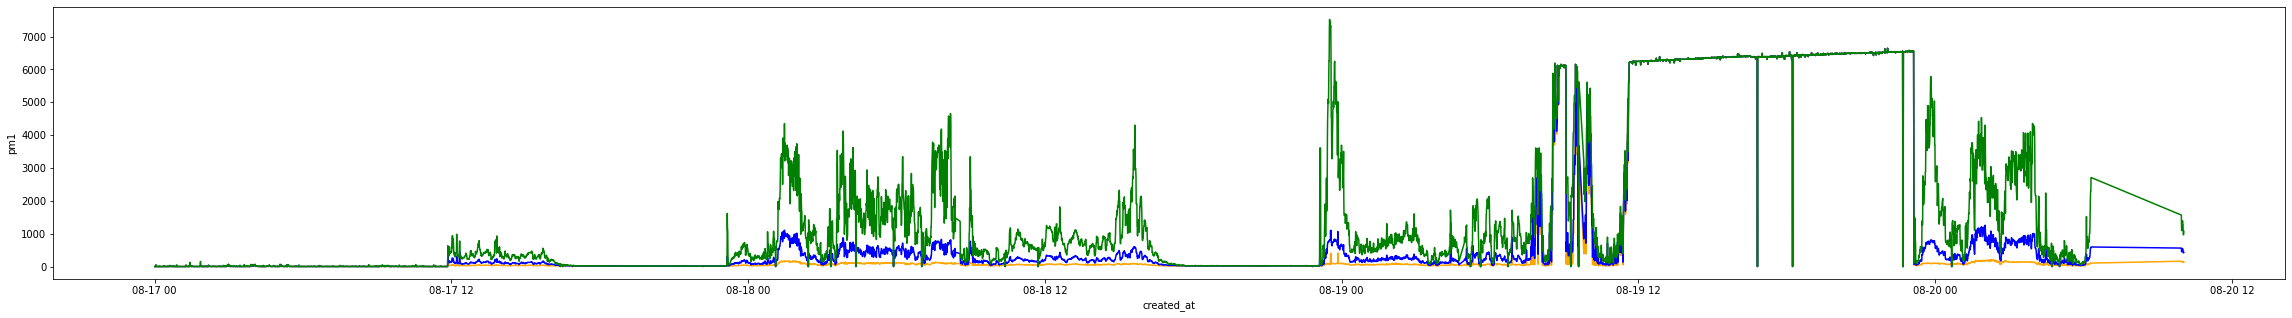

In [79]:
import seaborn as sns
from matplotlib import pyplot as plt

l1 = df_fin[['created_at','_at','time','pm1']]
l2 = df_fin[['created_at','_at','time','pm_2_5']]
l3 = df_fin[['created_at','_at','time','pm10']]

fig, axes = plt.subplots(1, 1, figsize=(40,5))
sns.lineplot(ax=axes, data=l1, color='orange', y = 'pm1', x = 'created_at')
sns.lineplot(ax=axes, data=l2, color='blue', y = 'pm_2_5', x = 'created_at')
sns.lineplot(ax=axes, data=l3, color='green', y='pm10', x = 'created_at')

In [80]:
df_fin['hour'] = df_fin.created_at.dt.hour
df_fin

,created_at,_at,time,pm1,pm_2_5,pm10,hour
19799,2021-08-17 00:00:22.733,17-08-2021,00:00:22,0,0,0,0
19800,2021-08-17 00:00:54.557,17-08-2021,00:00:54,0,0,0,0
19801,2021-08-17 00:01:26.456,17-08-2021,00:01:26,0,0,0,0
19802,2021-08-17 00:01:58.288,17-08-2021,00:01:58,0,0,0,0
19803,2021-08-17 00:02:45.306,17-08-2021,00:02:45,1,1,1,0
...,...,...,...,...,...,...,...
28114,2021-08-20 10:01:23.149,20-08-2021,10:01:23,149,496,1279,10
28115,2021-08-20 10:01:55.028,20-08-2021,10:01:55,135,423,1044,10
28116,2021-08-20 10:02:26.852,20-08-2021,10:02:26,129,417,964,10
28117,2021-08-20 10:02:58.786,20-08-2021,10:02:58,136,418,1005,10


<AxesSubplot:xlabel='_at', ylabel='hour'>

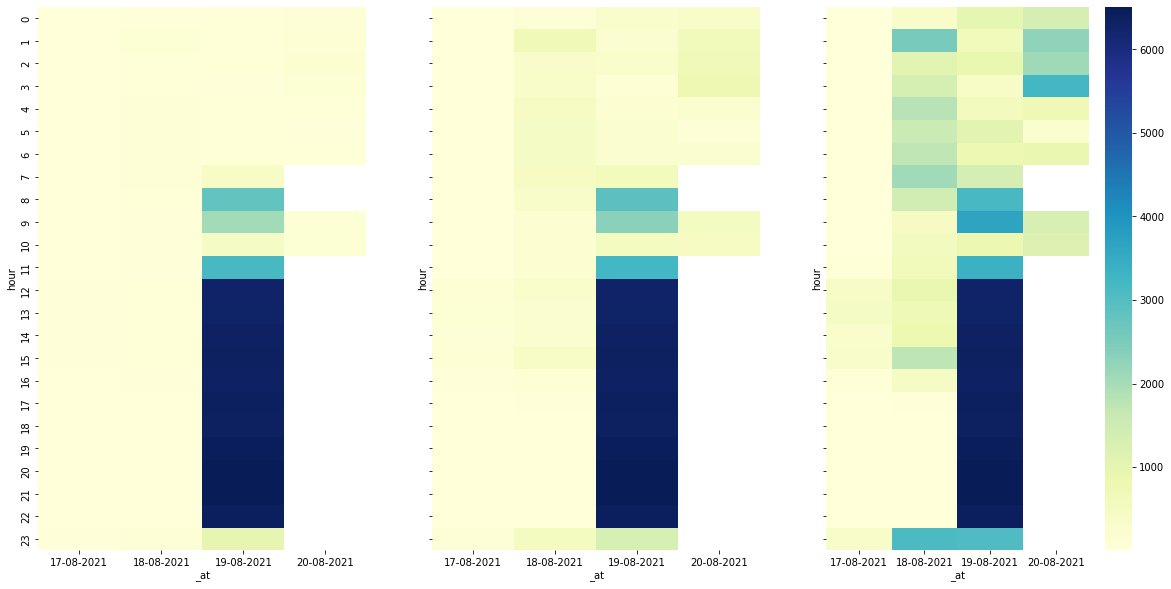

In [118]:
import numpy as np


table1 = pd.pivot_table(df_fin, values='pm1', index=['hour'],
                    columns=['_at'], aggfunc=np.mean)
table2_5 = pd.pivot_table(df_fin, values='pm_2_5', index=['hour'],
                    columns=['_at'], aggfunc=np.mean)
table10 = pd.pivot_table(df_fin, values='pm10', index=['hour'],
                    columns=['_at'], aggfunc=np.mean)


fig ,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.heatmap(table1,cmap="YlGnBu",cbar=False,ax=ax1)
sns.heatmap(table2_5,cmap="YlGnBu",cbar=False,ax=ax2)
sns.heatmap(table10,cmap="YlGnBu",ax=ax3)

